In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv("Data\Student Grades\student-mat.csv",sep =";")

In [4]:
# Creating y
y = df.G3

# Removing unwanted features and creating X
Features = ['school', 'age', 'address', 'Pstatus', 'studytime', 'failures', 'paid', 'internet', 'famrel', 'absences', 'G1', 'G2']
X = df[Features]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Categorical and numerical columns
categorical_cols = [cname for cname in X.columns if X[cname].nunique()<5 and X[cname].dtype == 'object']

numeric_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float46']]

In [27]:
# Preprocessing for categorical data
# categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_cols)])

# The model
model = LinearRegression()

# Bundle preprocessing and modeling code in a pipeline
new_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# cv_scores = -1 * cross_val_score(new_pipe,X,y,cv = 3, scoring = "neg_mean_absolute_error")

In [28]:
new_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['school', 'address',
                                                   'Pstatus', 'paid',
                                                   'internet'])])),
                ('model', LinearRegression())])

In [29]:
cv_scores = -1 * cross_val_score(new_pipe,X_train,y_train,cv = 5, scoring = "neg_mean_absolute_error")
cv_scores.mean()

3.3695932539682545

In [30]:
preds = new_pipe.predict(X_test)

In [31]:
# y_arr = y.to_numpy()

acc = mean_squared_error(y_test,preds)
acc

29.90446993670886

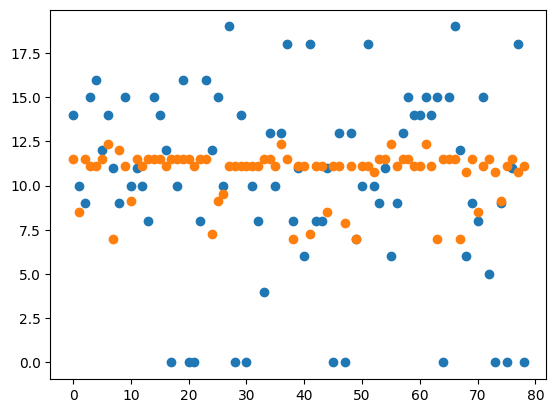

In [32]:
plt.scatter(range(len(y_test)), y_test)
plt.scatter(range(len(y_test)), preds)

In [33]:
preds

array([11.5  ,  8.5  , 11.5  , 11.125, 11.125, 11.5  , 12.375,  7.   ,
       12.   , 11.125,  9.125, 11.5  , 11.125, 11.5  , 11.5  , 11.5  ,
       11.125, 11.5  , 11.5  , 11.5  , 11.5  , 11.125, 11.5  , 11.5  ,
        7.25 ,  9.125,  9.5  , 11.125, 11.125, 11.125, 11.125, 11.125,
       11.125, 11.5  , 11.5  , 11.125, 12.375, 11.5  ,  7.   , 11.125,
       11.125,  7.25 , 11.125, 11.125,  8.5  , 11.125, 11.125,  7.875,
       11.125,  7.   , 11.125, 11.125, 10.75 , 11.5  , 11.5  , 12.375,
       11.125, 11.5  , 11.5  , 11.125, 11.125, 12.375, 11.125,  7.   ,
       11.5  , 11.5  , 11.5  ,  7.   , 10.75 , 11.5  ,  8.5  , 11.125,
       11.5  , 10.75 ,  9.125, 11.125, 11.5  , 10.75 , 11.125])